<a href="https://colab.research.google.com/github/anasayago/challenge3-data-science-latam/blob/main/TelecomX_3_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecom X – Parte 2: Predicción de Cancelación (Churn)

## 🧠 Objetivos del Desafío
* Preparar los datos para el modelado (tratamiento, codificación, normalización).
* Realizar análisis de correlación y selección de variables.
* Entrenar dos o más modelos de clasificación.
* Evaluar el rendimiento de los modelos con métricas.
* Interpretar los resultados, incluyendo la importancia de las variables.
* Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

## 1. Preparación

In [ ]:
#importar el archivo de datos
import pandas as pd
#cargar el archivo de datos
data = pd.read_csv('datos_tratados.csv',sep=',')
#mostrar las primeras filas del archivo de datos
data.head()


,ID Cliente,Abandono,Género,Mayor de 65 años,Tiene Pareja,Tiene Dependientes,Duración del Contrato (meses),Servicio Telefónico,Múltiples Líneas,Servicio de Internet,...,TV por Cable,Streaming de Películas,Tipo de Contrato,Facturación Sin Papel,Método de Pago,Costo Mensual,Costo Total,Costo Diario,Rango de Contrato,Cantidad de Servicios Contratados
0,0002-ORFBO,0,F,False,1,1,9,1,0,DSL,...,1,0,Anual,1,Cheque por Correo,65.6,593.30,2.19,6-10,3
1,0003-MKNFE,0,M,False,0,0,9,1,1,DSL,...,0,1,Mensual,0,Cheque por Correo,59.9,542.40,2.00,6-10,3
2,0004-TLHLJ,1,M,False,0,0,4,1,0,Fibra Óptica,...,0,0,Mensual,1,Cheque electrónico,73.9,280.85,2.46,0-5,2
3,0011-IGKFF,1,M,True,1,0,13,1,0,Fibra Óptica,...,1,1,Mensual,1,Cheque electrónico,98.0,1237.85,3.27,11-15,4
4,0013-EXCHZ,1,F,True,1,0,3,1,0,Fibra Óptica,...,1,0,Mensual,1,Cheque por Correo,83.9,267.40,2.80,0-5,3


In [ ]:
#eliminar las columnas que no son necesarias
data = data.drop(columns=['ID Cliente'])
#Eliminar las filas de rangos de contrato
data = data.drop(columns=['Rango de Contrato'])

In [ ]:
# Mostrar las columnas categóricas
cat_cols = data.select_dtypes(include=['object', 'category']).columns
list(cat_cols)

['Género', 'Servicio de Internet', 'Tipo de Contrato', 'Método de Pago']

In [ ]:
# Codificar variables categóricas usando one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)
# Mostrar las primeras filas del nuevo DataFrame codificado
data_encoded.head()

,Abandono,Mayor de 65 años,Tiene Pareja,Tiene Dependientes,Duración del Contrato (meses),Servicio Telefónico,Múltiples Líneas,Seguridad en Línea,Respaldo en Línea,Protección del Dispositivo,...,Costo Diario,Cantidad de Servicios Contratados,Género_M,Servicio de Internet_DSL,Servicio de Internet_Fibra Óptica,Tipo de Contrato_Bianual,Tipo de Contrato_Mensual,Método de Pago_Cheque por Correo,Método de Pago_Tarjeta de crédito (automático),Método de Pago_Transferencia bancaria (automático)
0,0,False,1,1,9,1,0,0,1,0,...,2.19,3,False,True,False,False,False,True,False,False
1,0,False,0,0,9,1,1,0,0,0,...,2.00,3,True,True,False,False,True,True,False,False
2,1,False,0,0,4,1,0,0,0,1,...,2.46,2,True,False,True,False,True,False,False,False
3,1,True,1,0,13,1,0,0,1,1,...,3.27,4,True,False,True,False,True,False,False,False
4,1,True,1,0,3,1,0,0,0,0,...,2.80,3,False,False,True,False,True,True,False,False


In [ ]:
# Proporción de clientes que abandonaron vs los que aun estan activos
proporcion = data['Abandono'].value_counts(normalize=True)
print("Proporción de cada clase:")
print(proporcion)
# Valores absolutos
print("\nCantidad de clientes por clase:")
print(data['Abandono'].value_counts())

Proporción de cada clase:
Abandono
0    0.73463
1    0.26537
Name: proportion, dtype: float64

Cantidad de clientes por clase:
Abandono
0    5174
1    1869
Name: count, dtype: int64


In [ ]:
# Variable dependiente
y = data_encoded['Abandono']
# Variables independientes
X = data_encoded.drop(columns=['Abandono'])

In [ ]:
# aplicar SMOTE para balancear el dataset
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
# Mostrar la proporción de clases después de aplicar SMOTE
print("\nProporción de clases después de SMOTE:")
print(y_resampled.value_counts(normalize=True))


Proporción de clases después de SMOTE:
Abandono
0    0.5
1    0.5
Name: proportion, dtype: float64


Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8005677785663591


## Análisis de Correlación

In [ ]:
#Crear matriz de correlación
correlation_matrix = data_encoded.corr()
# Mostrar la matriz de correlación
print(correlation_matrix)


                                                    Abandono  \
Abandono                                            1.000000   
Mayor de 65 años                                    0.150889   
Tiene Pareja                                       -0.150448   
Tiene Dependientes                                 -0.164221   
Duración del Contrato (meses)                      -0.352229   
Servicio Telefónico                                 0.011942   
Múltiples Líneas                                    0.040102   
Seguridad en Línea                                 -0.171226   
Respaldo en Línea                                  -0.082255   
Protección del Dispositivo                         -0.066160   
Soporte Técnico                                    -0.164674   
TV por Cable                                        0.063228   
Streaming de Películas                              0.061382   
Facturación Sin Papel                               0.191825   
Costo Mensual                           

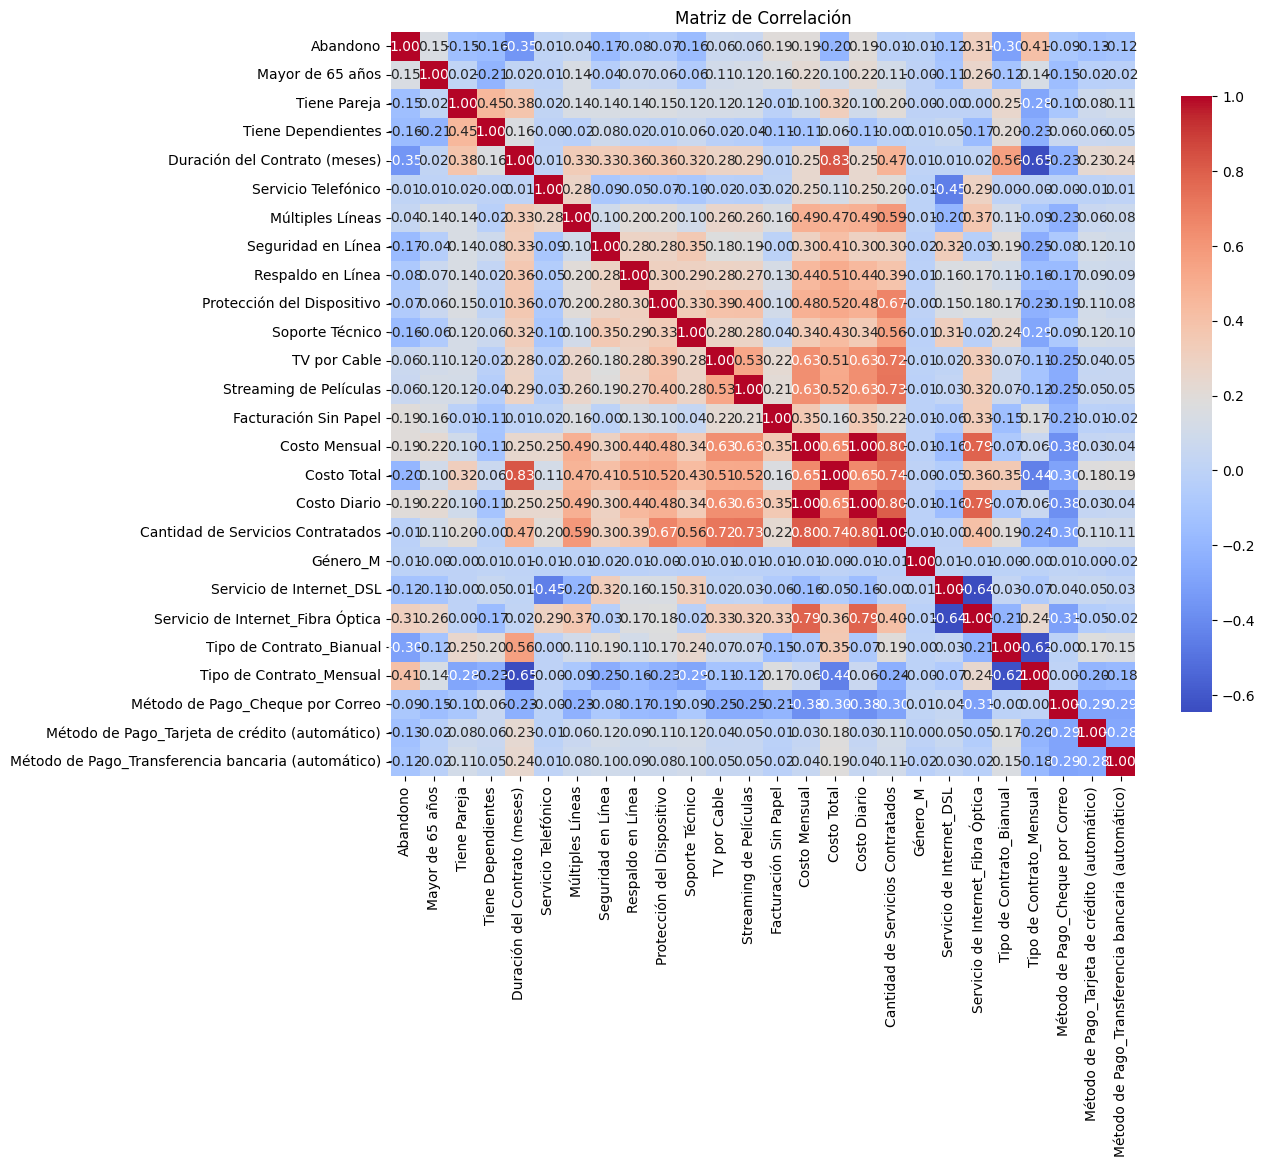

In [ ]:
#graficar mapa de calor de la matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación')
plt.show()

Del análisis de correlación puedes concluir lo siguiente:

- **Duración del Contrato** y **Costo Total** presentan una correlación negativa con el abandono, es decir, a menor duración del contrato y menor gasto total, **mayor probabilidad de abandono**.
- Los clientes que permanecen suelen tener contratos más largos y un mayor gasto total.
- Las variables más correlacionadas con el abandono son precisamente la duración del contrato y el gasto total, lo que indica que son factores clave para predecir la cancelación.
- Otras variables pueden tener correlaciones menores, pero estas dos destacan como las más relevantes según la matriz de correlación y los gráficos.

**En resumen:**  
La duración del contrato y el gasto total son variables predictoras importantes del abandono de clientes. Clientes con contratos cortos y bajo gasto tienen mayor riesgo de cancelar el servicio.

## Análisis dirigido

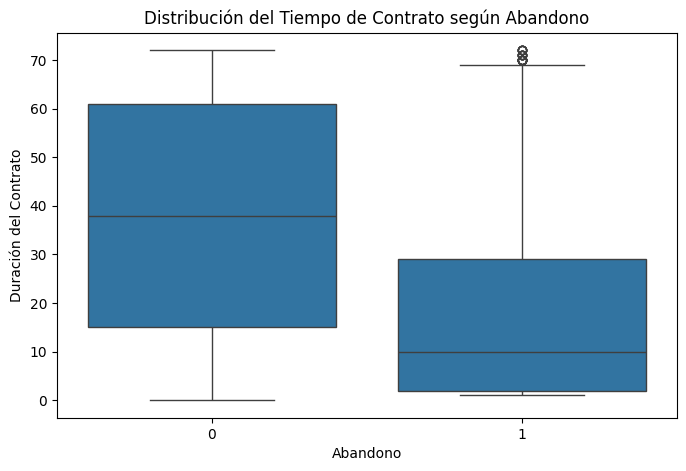

In [ ]:
# Boxplot: Tiempo de contrato vs Abandono
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x=data_encoded['Abandono'], y=data_encoded['Duración del Contrato (meses)'])
plt.title('Distribución del Tiempo de Contrato según Abandono')
plt.xlabel('Abandono')
plt.ylabel('Duración del Contrato')
plt.show()

Los clientes que abandonan suelen tener una menor duración del contrato en comparación con los que permanecen.
Esto se refleja en que la mediana y los cuartiles inferiores del grupo que abandona están más bajos que los del grupo que no abandona.

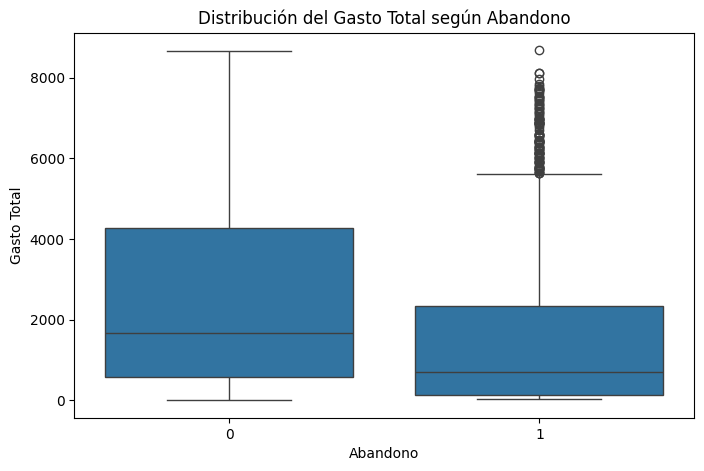

In [ ]:
# Boxplot: Gasto total vs Abandono
plt.figure(figsize=(8, 5))
sns.boxplot(x=data_encoded['Abandono'], y=data_encoded['Costo Total'])
plt.title('Distribución del Gasto Total según Abandono')
plt.xlabel('Abandono')
plt.ylabel('Gasto Total')
plt.show()


El gasto total de los clientes que abandonan tiende a ser menor que el de los clientes que permanecen.
Esto puede indicar que los clientes que llevan menos tiempo y gastan menos son más propensos a cancelar.

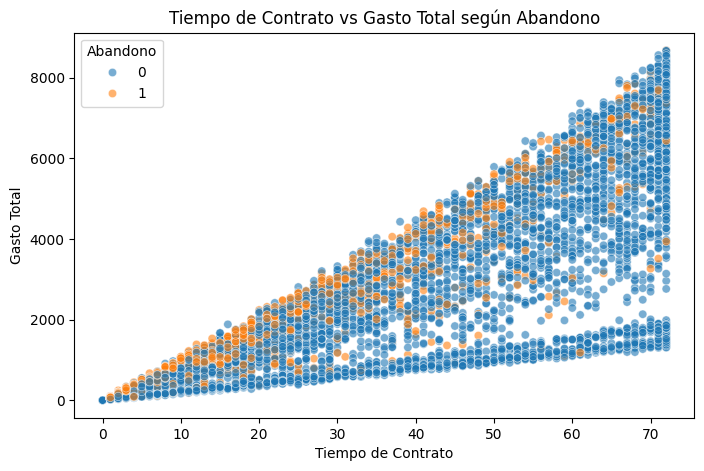

In [ ]:
# Scatter plot: Duración de contrato vs Gasto total, coloreado por Abandono
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data_encoded['Duración del Contrato (meses)'], y=data_encoded['Costo Total'], hue=data_encoded['Abandono'], alpha=0.6)
plt.title('Tiempo de Contrato vs Gasto Total según Abandono')
plt.xlabel('Tiempo de Contrato')
plt.ylabel('Gasto Total')
plt.legend(title='Abandono')
plt.show()

Se observa que la mayoría de los clientes que abandonan se concentran en la zona de baja duración de contrato y bajo gasto total.
Los clientes con mayor duración y mayor gasto tienden a permanecer activos.
Las variables Duración del Contrato y Costo Total están negativamente relacionadas con el abandono:

* A menor duración y menor gasto, mayor probabilidad de abandono.
* A mayor duración y mayor gasto, menor probabilidad de abandono.
* Estos patrones pueden ayudarte a identificar clientes en riesgo de cancelar y a enfocar estrategias de retención.

## Divide el conjunto de datos en entrenamiento y prueba

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#usar la divisio 80-20 para entrenamiento y prueba
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Random Forest
rdmforest_model = RandomForestClassifier(n_estimators=100, random_state=42)
rdmforest_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = rdmforest_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8005677785663591


In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Entrenar el modelo XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_xgb = xgb_model.predict(X_test)

# Evaluar el modelo
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy XGBoost: {accuracy_xgb}')

Accuracy XGBoost: 0.7877927608232789


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:56:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Random Forest
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# XGBoost
print("\nXGBoost:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1-score:", f1_score(y_test, y_pred_xgb))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

Random Forest:
Accuracy: 0.8005677785663591
Precision: 0.6716417910447762
Recall: 0.48257372654155495
F1-score: 0.5616224648985959
Matriz de confusión:
 [[948  88]
 [193 180]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.67      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409


XGBoost:
Accuracy: 0.7877927608232789
Precision: 0.6241610738255033
Recall: 0.49865951742627346
F1-score: 0.5543964232488823
Matriz de confusión:
 [[924 112]
 [187 186]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1036
           1       0.62      0.50      0.55       373

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



Análisis de Desempeño
#### Random Forest
* Accuracy: 0.8006
* Precision: 0.6716
* Recall: 0.4826
* F1-score: 0.5616
* Matriz de Confusión:
* Verdaderos Positivos (TP): 180
* Falsos Positivos (FP): 88
* Verdaderos Negativos (TN): 948
* Falsos Negativos (FN): 193

#### XGBoost
* Accuracy: 0.7878
* Precision: 0.6242
* Recall: 0.4987
* F1-score: 0.5544
* Matriz de Confusión:
* Verdaderos Positivos (TP): 186
* Falsos Positivos (FP): 112
* Verdaderos Negativos (TN): 924
* Falsos Negativos (FN): 187

####Comparación de Desempeño
* Accuracy
  * Random Forest tiene una precisión ligeramente superior (0.8006 vs. 0.7878).
* Precision
  * Random Forest tiene una precisión ligeramente superior (0.6716 vs. 0.6242).
* Recall:
  * XGBoost tiene un recall ligeramente superior (0.4987 vs. 0.4826).
* F1-score:
  * Random Forest tiene un F1-score ligeramente superior (0.5616 vs. 0.5544).

####Matriz de Confusión
* Random Forest tiene más verdaderos negativos (948 vs. 924) y menos falsos positivos (88 vs. 112).
* XGBoost tiene más verdaderos positivos (186 vs. 180) y menos falsos negativos (187 vs. 193).

#### Conclusión sobre el Mejor Desempeño
En términos generales, Random Forest parece tener un mejor desempeño en términos de precisión, F1-score y accuracy. Sin embargo, XGBoost tiene un mejor recall, lo que significa que es mejor para identificar casos positivos (abandono).
####Análisis de Overfitting y Underfitting
* Overfitting
  * Random Forest: No hay indicios claros de overfitting en las métricas proporcionadas. La diferencia entre la precisión en el conjunto de entrenamiento y el conjunto de prueba no es significativa.
  * XGBoost: Similarmente, no hay indicios claros de overfitting. La precisión en el conjunto de prueba es ligeramente menor que en el conjunto de entrenamiento, lo cual es esperado.
* Underfitting
  * Random Forest: El modelo parece estar capturando bien las tendencias de los datos, pero el recall es bajo, lo que sugiere que podría estar subestimando los casos positivos.
  * XGBoost: Similarmente, el modelo parece estar capturando bien las tendencias de los datos, pero el recall es bajo, lo que sugiere que podría estar subestimando los casos positivos.

####Posibles Ajustes
* Random Forest:
  * Aumentar la complejidad: Aumentar el número de árboles (n_estimators) o la profundidad máxima de los árboles (max_depth).
  * Ajustar parámetros: Experimentar con otros parámetros como min_samples_split, min_samples_leaf, y max_features.
* XGBoost:
  * Aumentar la complejidad: Aumentar el número de estimadores (n_estimators) o la profundidad máxima de los árboles (max_depth).
  * Ajustar parámetros: Experimentar con otros parámetros como learning_rate, subsample, y colsample_bytree.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Aumentar la complejidad del modelo
rdmforest_model_ajustado = RandomForestClassifier(
    n_estimators=300,        # Más árboles
    max_depth=12,            # Mayor profundidad máxima
    min_samples_split=3,     # Menos muestras para dividir un nodo
    min_samples_leaf=1,      # Menos muestras en una hoja
    max_features='sqrt',     # Número de características a considerar en cada división
    random_state=42
)

rdmforest_model_ajustado.fit(X_train, y_train)
y_pred_2 = rdmforest_model_ajustado.predict(X_test)

# Evaluar el nuevo modelo
from sklearn.metrics import classification_report
print("Reporte clasificación Random Forest ajustado:")
print(classification_report(y_test, y_pred_2))

Reporte clasificación Random Forest ajustado:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.67      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Aumentar la complejidad y ajustar parámetros de XGBoost
xgb_model_ajustado = xgb.XGBClassifier(
    n_estimators=300,         # Más árboles
    max_depth=10,             # Mayor profundidad máxima
    learning_rate=0.05,       # Tasa de aprendizaje más baja
    subsample=0.8,            # Porcentaje de muestras para cada árbol
    colsample_bytree=0.8,     # Porcentaje de columnas para cada árbol
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_model_ajustado.fit(X_train, y_train)
y_pred_xgb_ajustado = xgb_model_ajustado.predict(X_test)

# Evaluar el modelo ajustado
print("Reporte clasificación XGBoost ajustado:")
print(classification_report(y_test, y_pred_xgb_ajustado))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:56:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Reporte clasificación XGBoost ajustado:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1036
           1       0.61      0.48      0.54       373

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



Comparar nuevamente (verificar y completar)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Random Forest
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_2))
print("Precision:", precision_score(y_test, y_pred_2))
print("Recall:", recall_score(y_test, y_pred_2))
print("F1-score:", f1_score(y_test, y_pred_2))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_2))
print(classification_report(y_test, y_pred_2))

# XGBoost
print("\nXGBoost:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_ajustado))
print("Precision:", precision_score(y_test, y_pred_xgb_ajustado))
print("Recall:", recall_score(y_test, y_pred_xgb_ajustado))
print("F1-score:", f1_score(y_test, y_pred_xgb_ajustado))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_xgb_ajustado))
print(classification_report(y_test, y_pred_xgb_ajustado))

Random Forest:
Accuracy: 0.7998580553584103
Precision: 0.6716981132075471
Recall: 0.4772117962466488
F1-score: 0.5579937304075235
Matriz de confusión:
 [[949  87]
 [195 178]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.67      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409


XGBoost:
Accuracy: 0.7806955287437899
Precision: 0.6081081081081081
Recall: 0.48257372654155495
F1-score: 0.5381165919282511
Matriz de confusión:
 [[920 116]
 [193 180]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1036
           1       0.61      0.48      0.54       373

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409

